In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)


C:\Users\junai\AppData\Local\Temp\ipykernel_29364\2592194838.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
2007-10-08,30.879316,33.645352,30.685208,33.645352,126671715
2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.483549,80.517027,78.462750,79.520589,1.188963e+07
std,63.570576,64.313381,62.779670,63.552223,2.061999e+07
min,19.001732,20.312196,17.036036,20.213911,0.000000e+00
25%,36.529125,37.105424,35.989647,36.566536,4.799653e+06
50%,55.504944,56.145823,54.762127,55.611499,8.344398e+06
75%,83.112993,84.105052,82.127437,83.135591,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
1,2007-10-08,30.879316,33.645352,30.685208,33.645352,126671715
2,2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
3,2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
4,2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [11]:
df.to_csv('../data/powergrid.csv')

In [12]:
data01 = pd.read_csv('../data/powergrid.csv')

In [13]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.5454216003418,35.4246891776911,26.90011689528922,29.051480080819935,855215656
2,1,2007-10-08,30.879316329956055,33.64535221494326,30.685207701760945,33.64535221494326,126671715
3,2,2007-10-09,32.98217010498047,33.27333102819074,29.229417128249786,30.895508777439975,116725709
4,3,2007-10-10,33.28950500488281,33.968883374439955,32.99834410019465,33.83947682149577,67931378


In [14]:
# candlestick

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df = df.drop(['Date'], axis = 1)

C:\Users\junai\AppData\Local\Temp\ipykernel_29364\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545422,35.424689,26.900117,29.051480,855215656
1,30.879316,33.645352,30.685208,33.645352,126671715
2,32.982170,33.273331,29.229417,30.895509,116725709
3,33.289505,33.968883,32.998344,33.839477,67931378
4,37.009907,38.821581,32.998345,38.821581,106320954


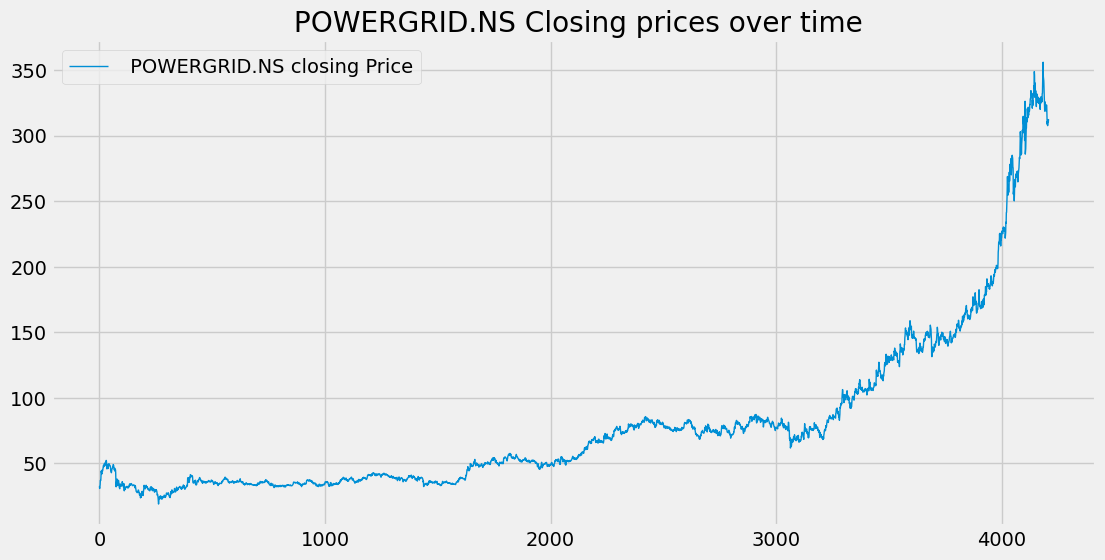

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f' {stock} closing Price', linewidth = 1)
plt.title(f' {stock} Closing prices over time')
plt.legend()
plt.show()

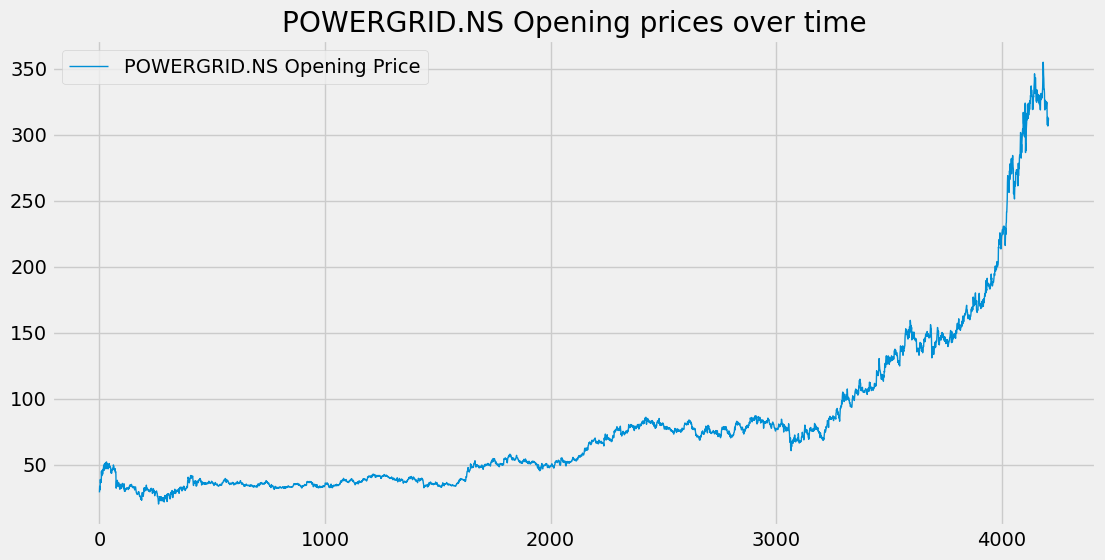

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

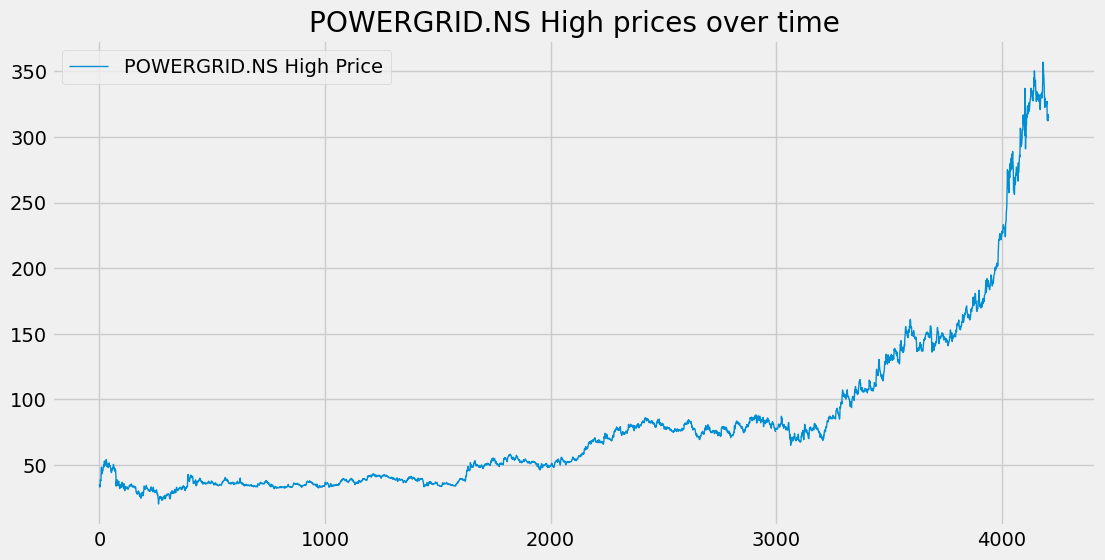

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

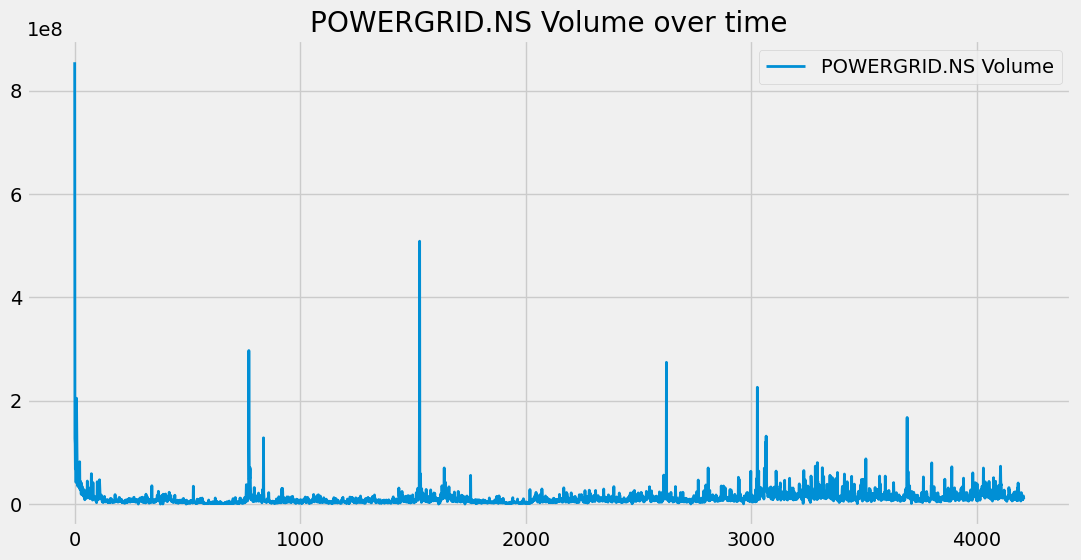

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [21]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [22]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,297.117669
4204,297.541901
4205,297.956183
4206,298.361184


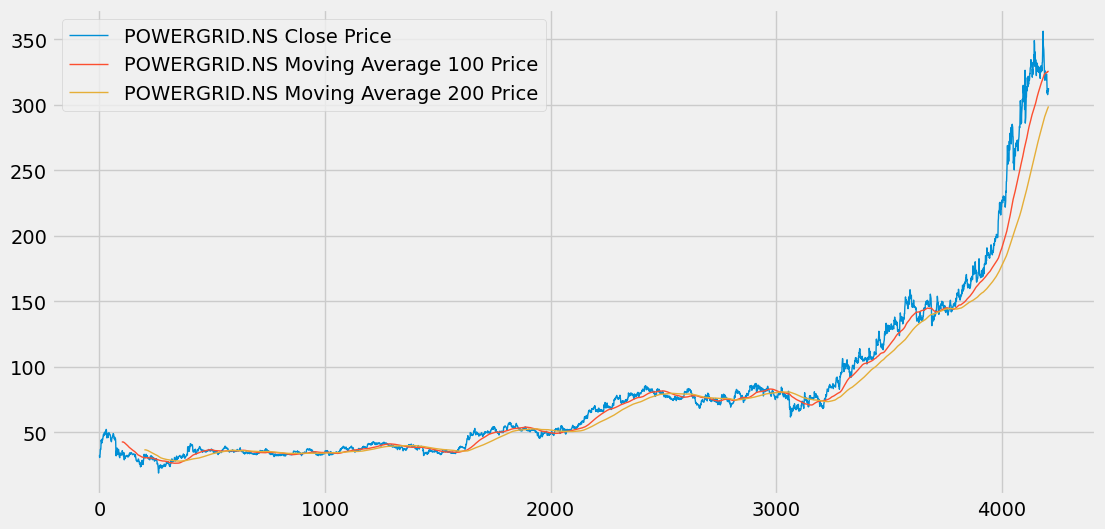

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [24]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

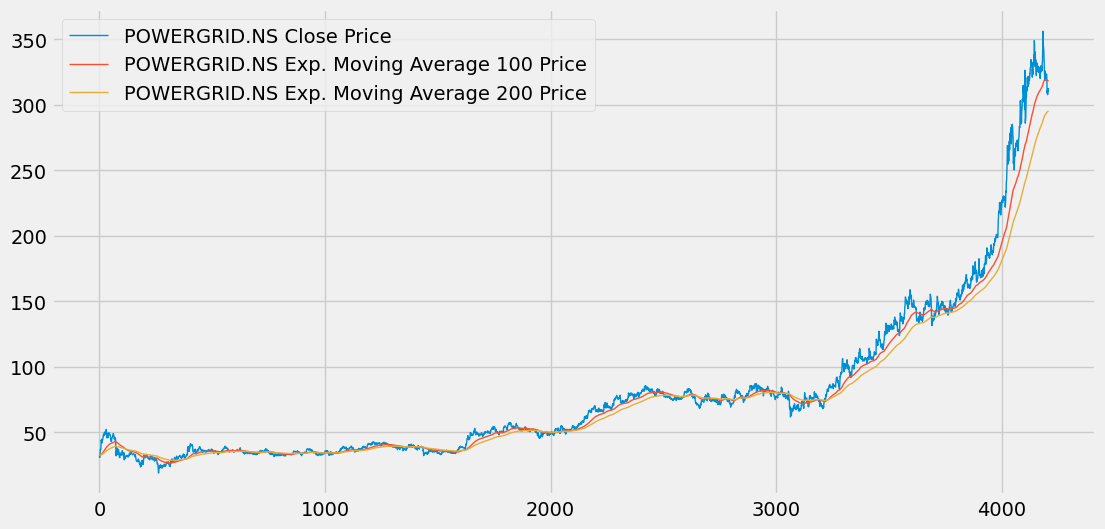

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [26]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][0:int(len(df)*0.70): int(len(df))])

In [27]:
data_training

Ticker,POWERGRID.NS
0,32.545422
1,30.879316
2,32.982170
3,33.289505
4,37.009907
...,...
2940,83.483856
2941,83.111992
2942,81.066734
2943,77.802582


In [28]:
data_testing

Ticker,POWERGRID.NS
0,32.545422


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0, 1))

In [32]:
data_training_array = scaler.fit_transform(data_training)